# 1. The 20 newsgroups text dataset

In [222]:
#(a) From the 20 newsgroups text dataset, select the training and test dataset with labels being one of
# talk.politics.guns
# talk.politics.mideast
# talk.politics.misc
# talk.religion.misc
# and see how to load the data as follows

In [15]:
import pickle
categories = ["talk.politics.guns","talk.politics.mideast","talk.politics.misc","talk.religion.misc",]
with open ("Text_train","rb") as f :
    Text_train = pickle.load ( f )
with open ("Text_test","rb") as f :
    Text_test = pickle.load ( f )
with open ("y_train","rb") as f :
    y_train = pickle.load ( f )
with open ("y_test","rb") as f :
    y_test = pickle.load ( f )
with open ("target_names","rb") as f :
    target_names = pickle.load ( f )

In [2]:
#(b) Transform text into feature inputs by word-based tokenization. Remember to delete the stop words. There is no standardization.

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf_vectorizer = TfidfVectorizer (stop_words='english') 
X_train = tfidf_vectorizer.fit_transform (Text_train)
X_test = tfidf_vectorizer.transform(Text_test)

In [4]:
#(c) Implement the multiclass classification by the OvR method and logistic regression. 
#Remember to add (penalty=’none’) in LogisticRegression().

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
clf = LogisticRegression (penalty = None)
ovr_classifier=OneVsRestClassifier(clf, n_jobs=-1)
ovr_classifier=ovr_classifier.fit(X_train, y_train)
y_pred_ovr=ovr_classifier.predict(X_test)
accuracy_ovr=accuracy_score(y_test, y_pred_ovr)
print("Accuracy:",accuracy_ovr)

Accuracy: 0.8616448885472713


In [245]:
#(d) To obtain which word has the most positive effect to be classified as ”talk.politics.guns”,”talk.politics.mideast”, ”talk.politics.misc” and ”talk.religion.misc”, respectively,
#check the coefficients of the (OvR and logistic) classifier.

In [251]:
ovr_coefficients = np.argmax(ovr_classifier.estimators_[1].coef_)
ovr_feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

for i, category in enumerate(categories):
    coefficients = model.coef_[i]
    index = np.argmax(coefficients)
    word = ovr_feature_names[index]
    print(f"The most positive word for {category}: {word}")
    print(coefficients)


The most positive word for talk.politics.guns: gun
[ 5.60969227  4.00064762 -0.08182245 ...  0.60821814 -0.55724981
 -0.55724981]
The most positive word for talk.politics.mideast: israel
[ 2.14185328  4.06535156  0.16165652 ... -0.05620896 -0.33976727
 -0.33976727]
The most positive word for talk.politics.misc: cramer
[  1.25389407 -10.45452671  -0.15991256 ...  -0.05400501  -0.52653356
  -0.52653356]
The most positive word for talk.religion.misc: christian
[ -7.27599493 -14.08315601  -0.07371011 ...  -0.07611044   1.57516085
   1.57516085]


['00' '000' '0000' ... 'zz_g9q3'
 'º_________________________________________________º_____________________º'
 'ºnd']
[ 5.60969227  4.00064762 -0.08182245 ...  0.60821814 -0.55724981
 -0.55724981]


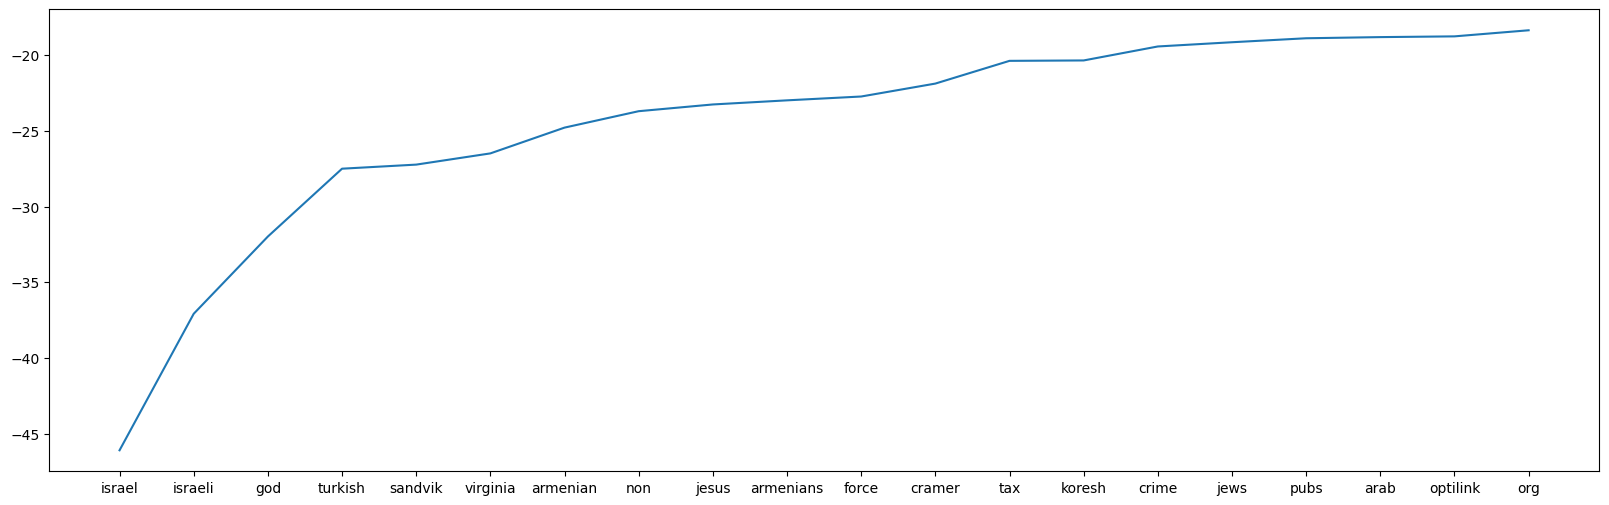

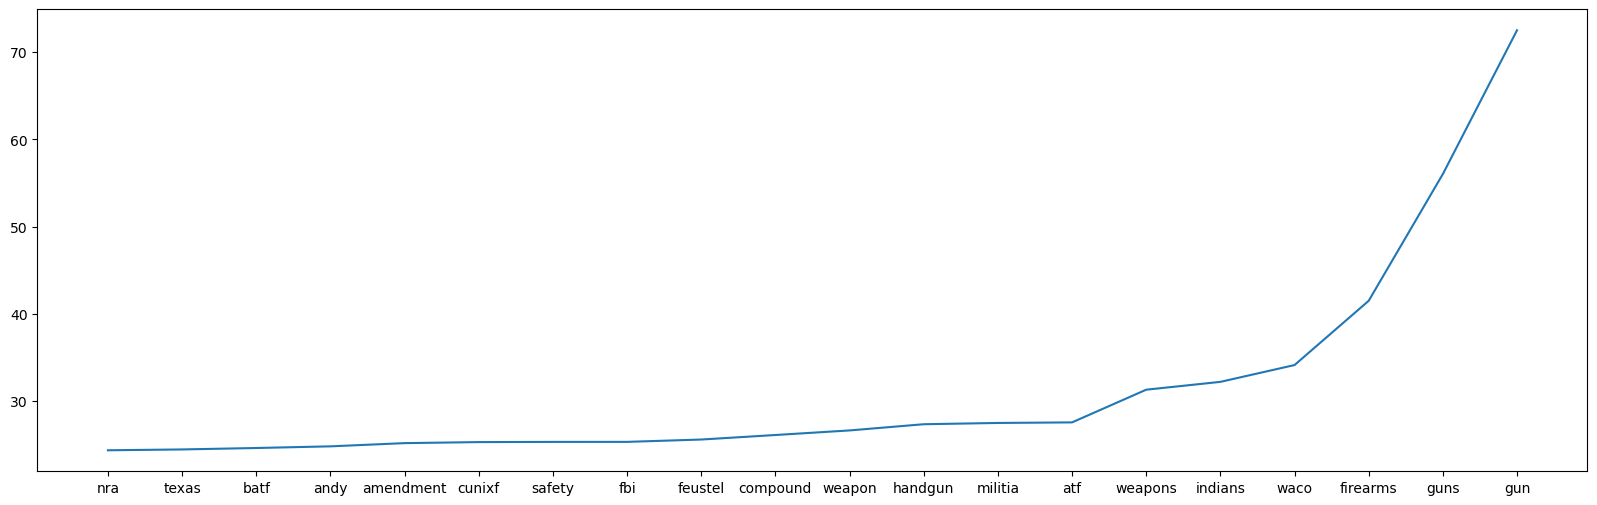

In [18]:
weight=ovr_classifier.estimators_[0].coef_.squeeze()
feature_names=tfidf_vectorizer.get_feature_names_out()
print(feature_names)
print(weight)
import matplotlib.pyplot as plt
order=np.argsort(weight)
feature_names=feature_names[order]
weight=weight[order]
plt.figure(figsize=(20, 6))
plt.plot(feature_names[0:20],weight[0:20])
plt.show()
plt.figure(figsize=(20, 6))
plt.plot(feature_names[-20:],weight[-20:])
plt.show()

# 2.Titanic Dataset 

In [ ]:
#Data Loading and preprocessing

In [21]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
#Default theme
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
titanic = pd.read_csv('train.csv') # here we only use train.csv for both training and test for simplicity
titanic.head().style.set_properties(
    **{'background-color': 'LightBlue',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [22]:
print('Shape of Titanic data set is :',titanic.shape)
print('Size of Titanic data set is  :',titanic.size)

Shape of Titanic data set is : (891, 12)
Size of Titanic data set is  : 10692


In [23]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
titanic['Embarked'] = titanic['Embarked'].fillna(method='bfill')
titanic = titanic.drop(['Cabin'],axis=1)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
titanic = titanic.drop(['Name','Ticket'],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [28]:
titanic = pd.get_dummies(titanic,columns=['Sex','Embarked'],drop_first=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
X = titanic.drop(['Survived'],axis=1) 
y = titanic['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.360492,-1.584396,0.010681,-0.479698,-0.460682,-0.018600,0.728823,-0.311564,-1.611198
1,-1.632266,-1.584396,-0.119643,-0.479698,-0.460682,0.079245,0.728823,-0.311564,0.620656
2,-1.344650,-1.584396,-0.503148,-0.479698,0.810657,0.646624,0.728823,-0.311564,-1.611198
3,-1.686680,-0.381742,-1.193456,0.493365,-0.460682,-0.031329,-1.372075,-0.311564,-1.611198
4,-1.111449,0.820913,0.033758,-0.479698,-0.460682,-0.479818,0.728823,-0.311564,0.620656


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.676433,0.820913,-0.273045,0.493365,-0.460682,-0.315867,-1.372075,-0.311564,0.620656
1,-0.248601,0.820913,-0.809952,-0.479698,-0.460682,-0.485419,0.728823,-0.311564,0.620656
2,1.096196,0.820913,-0.733251,-0.479698,-0.460682,-0.467343,0.728823,-0.311564,0.620656
3,1.488753,0.820913,0.010681,-0.479698,-0.460682,0.506858,0.728823,-0.311564,0.620656
4,0.027354,-0.381742,0.493964,0.493365,2.081997,-0.078596,0.728823,-0.311564,0.620656


In [30]:
#Model Implementation

# Improved LogisticRegression

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)
Y_pred = best_model.predict(X_test)
log_train = round(best_model.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
print(best_params)
print("Training Accuracy:", log_train)
print("Test Score:", log_accuracy)

{'C': 0.01, 'penalty': 'l2'}
Training Accuracy: 80.76
Test Score: 81.01


C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

# Improved Support Vector Machines (rbf kernel)

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid={'C': [0.01 , 0.1 , 1 , 10 , 100 , 1000], 'gamma': [0.001 , 0.01 , 0.1 , 1 , 10 , 100]}
kernel='rbf'
grid=GridSearchCV(SVC(kernel=kernel), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
best_params=grid.best_params_
print(best_params)

{'C': 100, 'gamma': 0.01}


In [33]:
best_svc=SVC(kernel=kernel, C=best_params['C'], gamma=best_params['gamma'])
best_svc.fit(X_train, y_train)
y_pred=best_svc.predict(X_test)
best_svc_train = round(best_svc.score(X_train, y_train) * 100, 2)
best_svc_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Training Accuracy:",best_svc_train)
print("Test Score:",best_svc_accuracy)

Training Accuracy: 85.53
Test Score: 80.45


# Improved KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
r = 5
k_values = np.arange(1, 100, 1) 
param_grid = {'n_neighbors': k_values}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=r, scoring='accuracy')
grid_search.fit(X_train, y_train)
r_fold_cv_scores = grid_search.cv_results_['mean_test_score']
ind_r_fold_cv_scores = sorted(range(len(r_fold_cv_scores)), key=lambda k: r_fold_cv_scores[k], reverse=True)
sorted_r_fold_cv_scores = np.asarray(r_fold_cv_scores)
print("Print out the largest {0}-fold CV error or score:".format(r))
print(sorted_r_fold_cv_scores[ind_r_fold_cv_scores[0:5]])
the_number_of_nearest_neighbors = np.array(ind_r_fold_cv_scores) + 1
print("Print out the corresponding number of nearest neighbors:")
print(the_number_of_nearest_neighbors[0:5])
k_r_fold_cv = len(r_fold_cv_scores) - np.argmax(r_fold_cv_scores[::-1])
print(k_r_fold_cv)

Print out the largest 5-fold CV error or score:
[0.81459667 0.81318822 0.81317837 0.81317837 0.81178962]
Print out the corresponding number of nearest neighbors:
[10  8 15 12 11]
10


In [35]:
knn  =KNeighborsClassifier(n_neighbors=k_r_fold_cv)
knn.fit (X_train, y_train)
y_pred = knn.predict(X_test)
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Training Accuracy:",knn_train)
print("Test Score:",knn_accuracy)

Training Accuracy: 84.55
Test Score: 80.45


# Perceptron

In [36]:
from sklearn.linear_model import Perceptron
np.random.seed(0)
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
print("Training Accuracy:",perceptron_train)
print("Test Score:",perceptron_accuracy)

Training Accuracy: 73.17
Test Score: 72.07


# Improved Linear SVC

In [37]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01 , 0.1 , 1 , 10 , 100 , 1000]}
linear_svc = LinearSVC()
grid = GridSearchCV(linear_svc, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(best_params)

C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_clas

{'C': 0.01}


C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yaoyu

In [38]:
linear_svc = LinearSVC(C=best_params['C'])
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Training Accuracy:", linear_svc_train)
print("Test Score:", linear_svc_accuracy)

Training Accuracy: 80.2
Test Score: 81.01


C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# Decision Tree Classifier

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'ccp_alpha': np.arange(0.001,0.05,0.001),
           'min_samples_leaf':range(1, 5),
           'max_depth':range(0,10)}

grid=GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
best_params=grid.best_params_
print("The best hyperparameters are %s with a score of %0.2f"%(grid.best_params_, grid.best_score_))

The best hyperparameters are {'ccp_alpha': 0.004, 'max_depth': 5, 'min_samples_leaf': 1} with a score of 0.82


C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
980 fits failed out of a total of 9800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
980 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\yaoyu\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yaoyu\anaconda3\Lib\site-packa

In [54]:
best_decision_tree=tree.DecisionTreeClassifier(ccp_alpha=best_params['ccp_alpha'],min_samples_leaf=best_params['min_samples_leaf'],max_depth=best_params['max_depth'])
best_decision_tree.fit(X_train, y_train)
y_pred=best_decision_tree.predict(X_test)
decision_train = round(best_decision_tree.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
print("Training Accuracy:",decision_train)
print("Test Score:",decision_accuracy)

Training Accuracy: 84.41
Test Score: 72.07


In [55]:
#Comparing Models

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Perceptron','Linear SVC', 'Decision Tree',],
    'Training Accuracy': [best_svc_train, knn_train, log_train, perceptron_train, linear_svc_train,  decision_train,],
    'Test Score': [best_svc_accuracy, knn_accuracy, log_accuracy, perceptron_accuracy,linear_svc_accuracy,  decision_accuracy,]
})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Test Score
0,Support Vector Machines,85.53,80.45
1,KNN,84.55,80.45
5,Decision Tree,84.41,72.07
2,Logistic Regression,80.76,81.01
4,Linear SVC,80.20,81.01
3,Perceptron,73.17,72.07


In [57]:
models.sort_values(by='Test Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'})

C:\Users\yaoyu\AppData\Local\Temp\ipykernel_2220\929548747.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  cmap='coolwarm').hide_index().set_properties(**{


Model,Training Accuracy,Test Score
Logistic Regression,80.760000,81.010000
Linear SVC,80.200000,81.010000
Support Vector Machines,85.530000,80.450000
KNN,84.550000,80.450000
Perceptron,73.170000,72.070000
Decision Tree,84.410000,72.070000
